In [1]:
#| hide
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.3 MB/s eta 0:00:00


In [ ]:
#| hide
from nixtla.utils import in_colab

# Anomaly detection

Anomaly detection is task of detecting abnormal points, points that deviate from the normal behaviour of the general series. This is crucial in many application, such as cybersecurity or equipment monitoring.

In this tutorial, we explore in detail the anomaly detection capability of TimeGPT.

## Import packages

First, we import the required packages for this tutorial and create an instance of `NixtlaClient`.

In [3]:
import pandas as pd
from nixtla import NixtlaClient

In [4]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-PseOV5xcLQgFjLnmaFe2YibaW13DDtTJExJWjDBhhtQsyXt3BvjfhsMhxbLbbMgl79gmK9TE9BoWhSWD'
)

## Load dataset

Now, let's load the dataset for this tutorial. We use the Peyton Manning dataset which tracks the visits to the Wikipedia page of Peyton Mannig.

In [5]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Ensure the 'Month' column is parsed as datetime
df['Month'] = pd.to_datetime(df['Month'])

# Rename columns for consistency
df.rename(columns={'Month': 'ds', 'Passengers': 'y'}, inplace=True)

# Display the structure of the dataset
print(df.info())

# Dataset ready for time series modeling
print(df.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None
          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


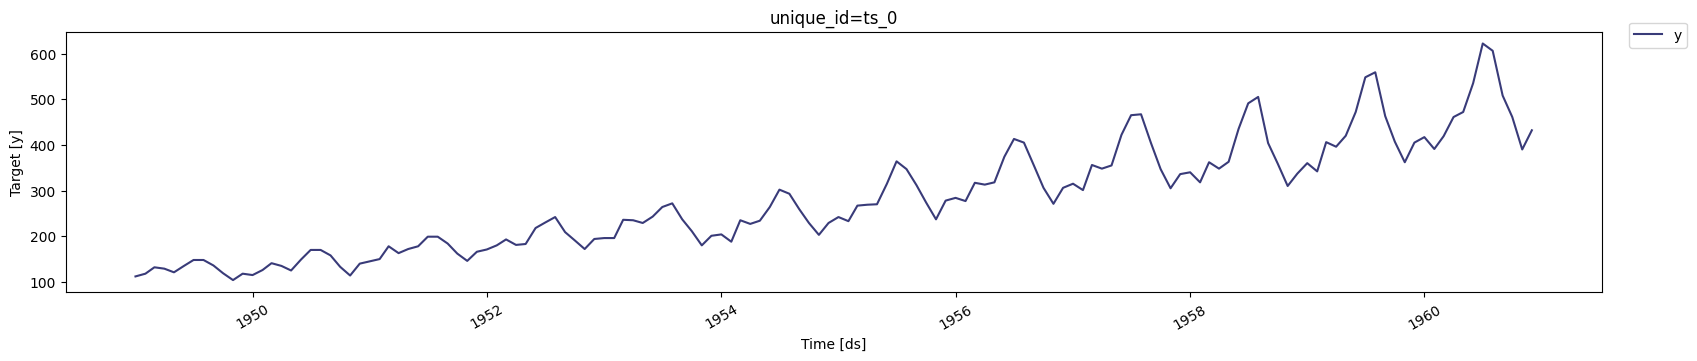

In [6]:
nixtla_client.plot(df, max_insample_length=365)

## Anomaly detection

We now perform anomaly detection. By default, TimeGPT uses a 99% confidence interval. If a point falls outisde of that interval, it is considered to be an anomaly.

In [8]:
anomalies_df = nixtla_client.detect_anomalies(df)
anomalies_df.head()

,ds,y,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,1951-01-01,145,135.48453,182.81158,88.157470,False
1,1951-02-01,150,144.44392,191.77098,97.116870,False
2,1951-03-01,178,157.19193,204.51898,109.864870,False
3,1951-04-01,163,148.77002,196.09708,101.442960,False
4,1951-05-01,172,140.47383,187.80089,93.146774,False


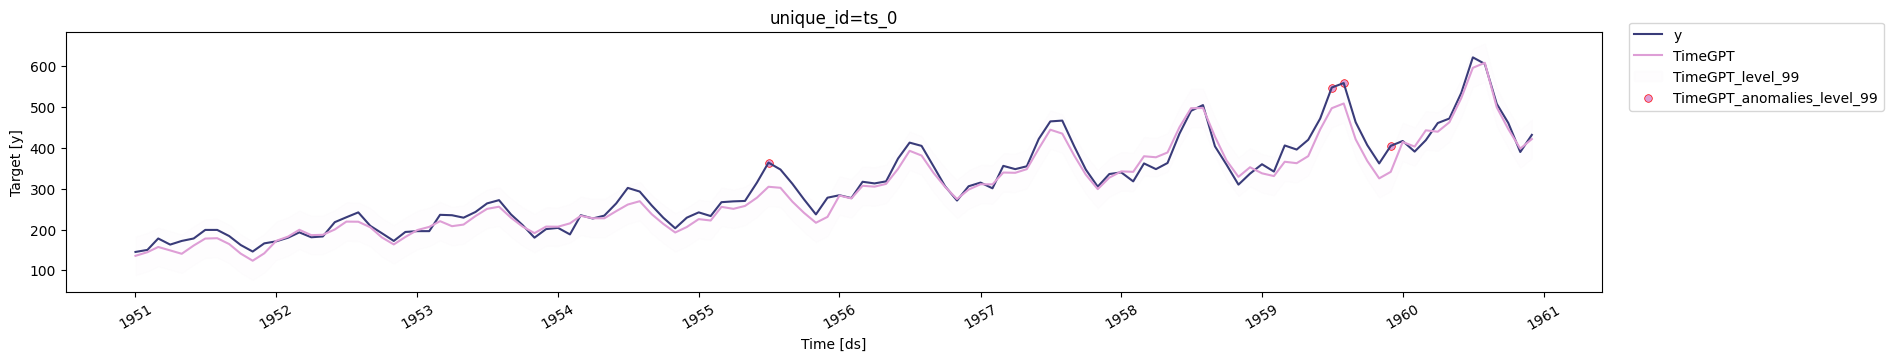

In [9]:
nixtla_client.plot(df, anomalies_df)

## Anomaly detection with exogenous features

Previously, we performed anomaly detection without using any exogenous features. Now, it is possible to create features specifically for this scnenario to inform the model in its task of anomaly detection.

Here, we create date features that can be used by the model.

This is done using the `date_features` argument. We can set it to `True` and it will generate all possible features from the given dates and frequency of the data. Alternatively, we can specify a list of features that we want. In this case, we want only features at the *month* and *year* level.

In [12]:
anomalies_df_x = nixtla_client.detect_anomalies(
    df,
    date_features=['month', 'year'],
    date_features_to_one_hot=True,
)

Then, we can plot the weights of each feature to understand its impact on anomaly detection.

<Axes: ylabel='features'>

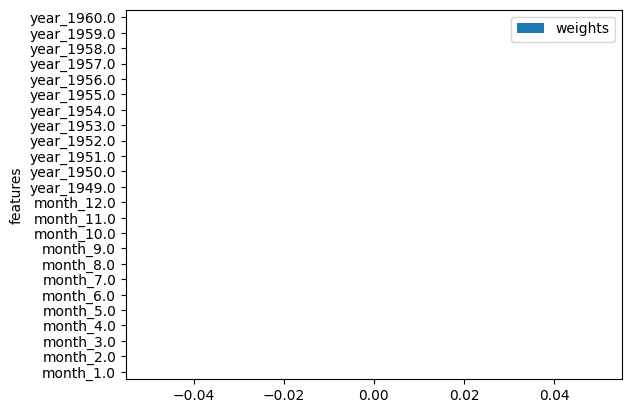

In [13]:
nixtla_client.weights_x.plot.barh(x='features', y='weights')

## Modifying the confidence intervals

We can tweak the confidence intervals using the `level` argument. This takes any values between 0 and 100, including decimal numbers.

Reducing the confidence interval resutls in more anomalies being detected, while increasing it will reduce the number of anomalies.

Here, for example, we reduce the interval to 70%, and we will notice more anomalies being plotted (red dots).

In [10]:
anomalies_df = nixtla_client.detect_anomalies(
    df,
    level=70
)

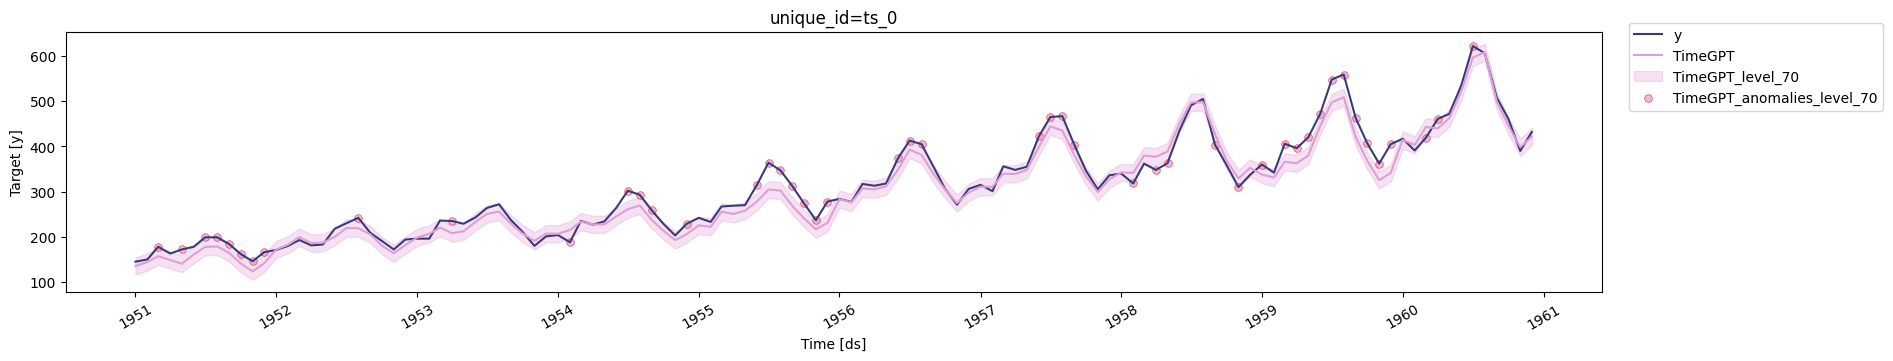

In [11]:
nixtla_client.plot(df, anomalies_df)